# Machine-Predictive-Maintenance

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

## Importing the dataset

In [20]:
maintenance = pd.read_csv("predictive_maintenance.csv")

In [21]:
maintenance

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [22]:
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Using the ".info()" methode we found out that there are no null values in our dataset. Due to this we do not have to take any extra steps cleaning the dataset of null values.

In [23]:
maintenance.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## Cleaning the dataset of redundant or misleading columns

In [24]:
maintenance_prepared = maintenance.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

maintenance_prepared

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


## Casting text-based Columns into float

In [25]:
maintenance_prepared['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [26]:
type_encoder = OrdinalEncoder(categories=[['L','M','H']])

maintenance_prepared['Type'] = type_encoder.fit_transform(maintenance_prepared[['Type']])

maintenance_prepared

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1.0,298.1,308.6,1551,42.8,0,0
1,0.0,298.2,308.7,1408,46.3,3,0
2,0.0,298.1,308.5,1498,49.4,5,0
3,0.0,298.2,308.6,1433,39.5,7,0
4,0.0,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,1604,29.5,14,0
9996,2.0,298.9,308.4,1632,31.8,17,0
9997,1.0,299.0,308.6,1645,33.4,22,0
9998,2.0,299.0,308.7,1408,48.5,25,0


In [27]:
maintenance_prepared['Target'].unique()

array([0, 1], dtype=int64)

<AxesSubplot: ylabel='Target'>

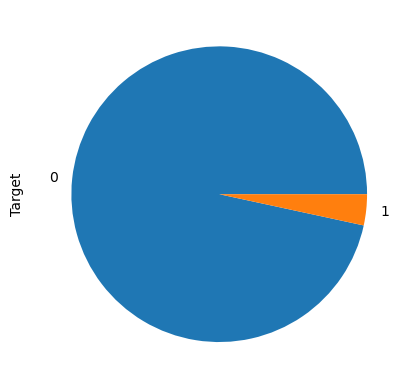

In [28]:
maintenance_prepared['Target'].value_counts().plot(kind='pie')

<AxesSubplot: >

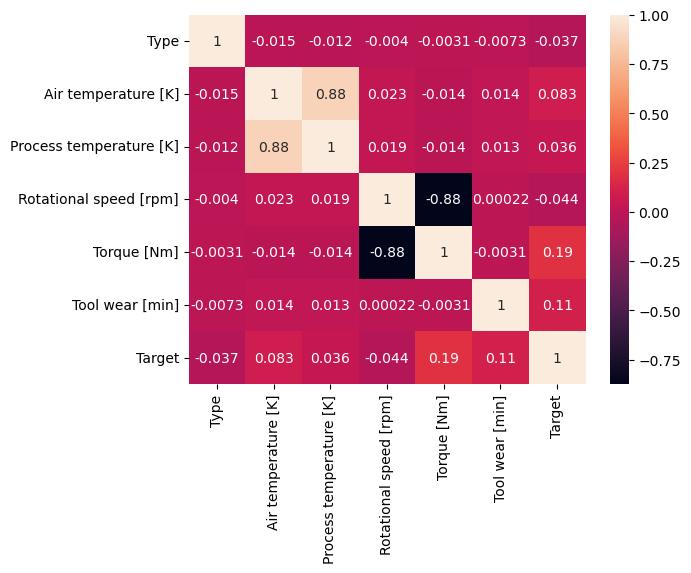

In [29]:
maintenance_prep = maintenance_prepared.corr(numeric_only='True')
sns.heatmap(maintenance_prep, annot=True)

<Figure size 640x480 with 0 Axes>

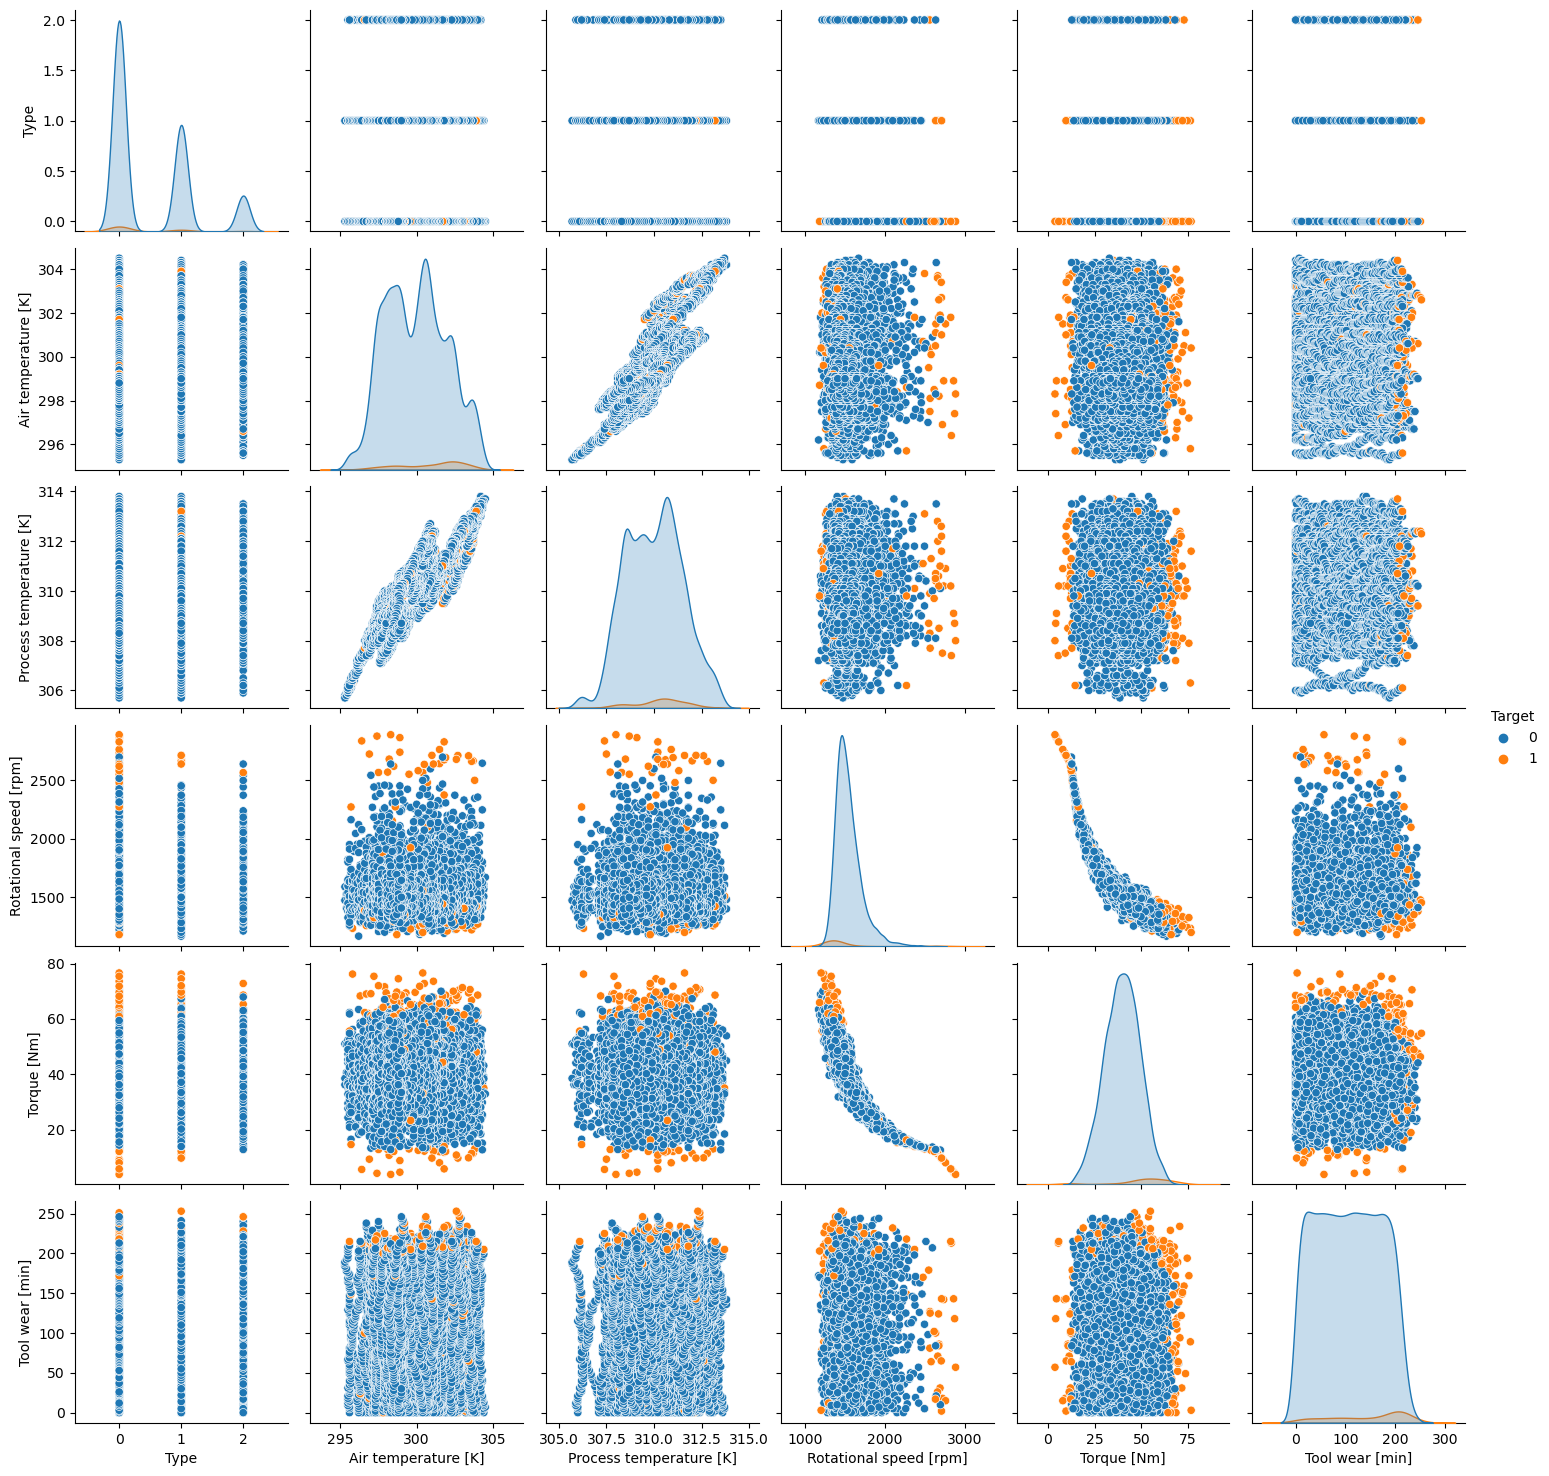

<Figure size 640x480 with 0 Axes>

In [42]:
sns.pairplot(data=maintenance_prepared, hue='Target')
plt.figure()

In [43]:
maintenance_prepared.to_csv('predictive_maintenance_prepared.csv')